In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

2024-06-20 23:56:38.878038: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-20 23:56:38.878137: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-20 23:56:38.999435: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_dataset_path = '/kaggle/input/kuhar-img84-dataset/classified_data/train'
validation_dataset_path = '/kaggle/input/kuhar-img84-dataset/classified_data/validation'

In [4]:
IMG_WIDTH = 369
IMG_HEIGHT = 369
BATCH_SIZE = 24

In [5]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 10905 images belonging to 18 classes.


In [6]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 4665 images belonging to 18 classes.


# LABELS:
**1 WALKING 2 WALKING_UPSTAIRS 3 WALKING_DOWNSTAIRS 4 SITTING 5 STANDING 6 LAYING**



In [7]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : 1
1 : 10
2 : 11
3 : 12
4 : 13
5 : 14
6 : 15
7 : 16
8 : 17
9 : 18
10 : 2
11 : 3
12 : 4
13 : 5
14 : 6
15 : 7
16 : 8
17 : 9


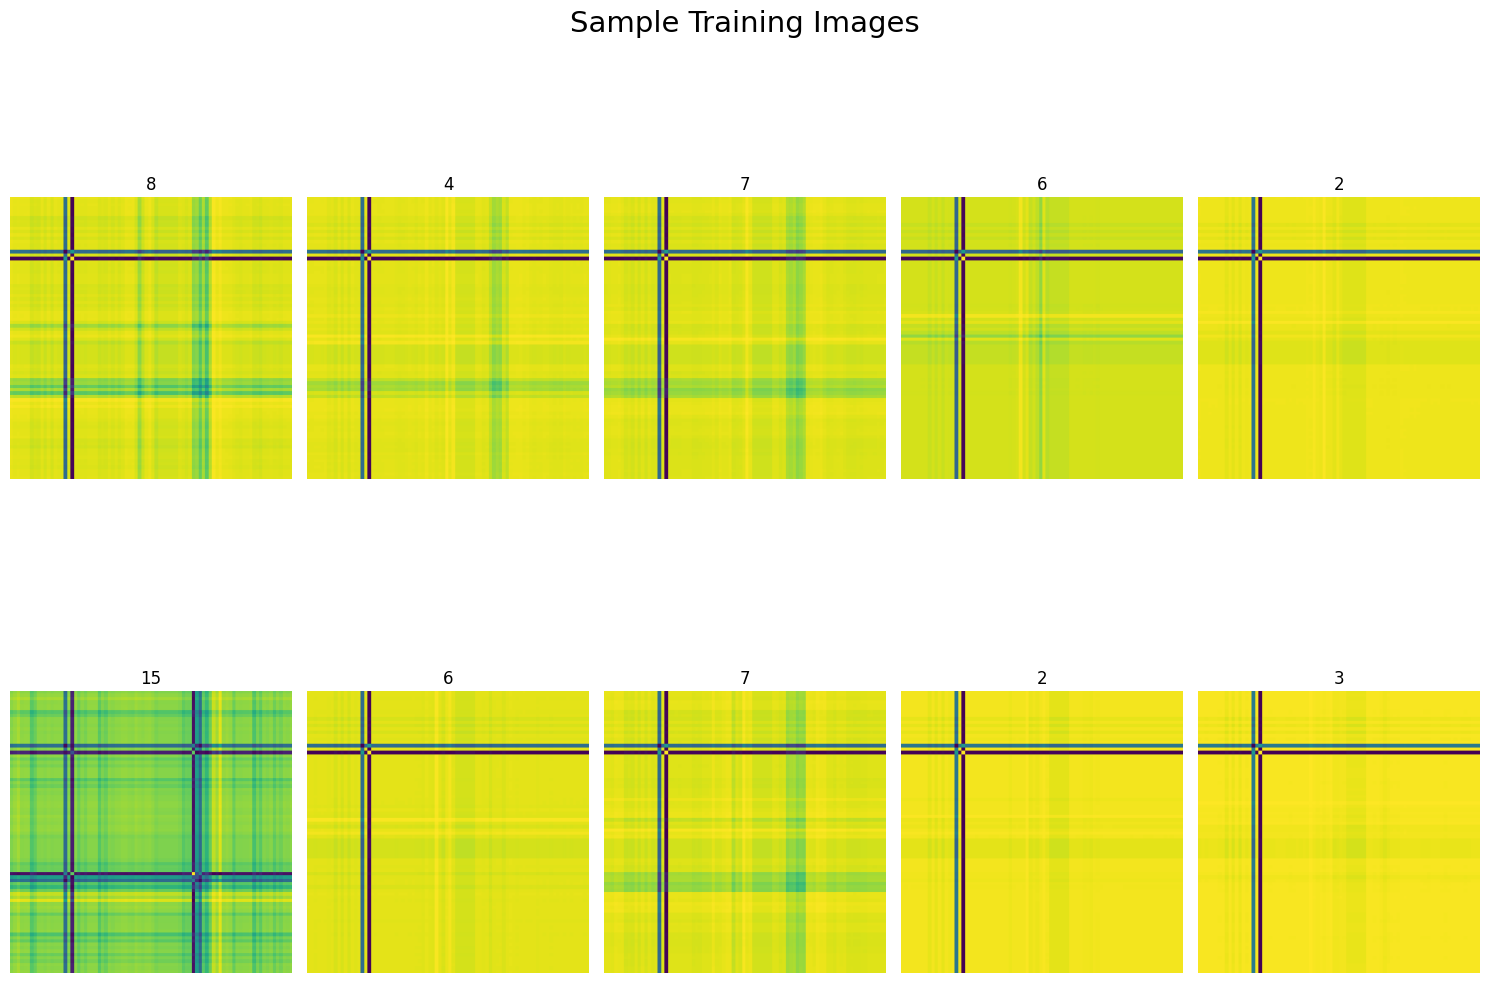

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
from skimage import io
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
import os
import glob
import random
%matplotlib inline

In [10]:
basemodel =Xception(weights = 'imagenet', include_top = False, input_tensor = Input(shape=(369, 369, 3)))

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
headmodel = basemodel.output
headmodel = MaxPooling2D(pool_size = (4,4))(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Flatten(name= 'flatten')(headmodel)
headmodel = Dense(18, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [12]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 369, 369,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 184, 184,  │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 184, 184,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 184, 184,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 182, 182,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 182, 182,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 182, 182,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 182, 182,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 182, 182,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 182, 182,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 182, 182,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 182, 182,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 91, 91,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 91, 91,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 91, 91,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 91, 91,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 91, 91,    │          0 │ add[0][0]       

 Total params: 21,427,514 (81.74 MB)

 Trainable params: 21,372,986 (81.53 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [13]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [15]:
optimizer = Adam(learning_rate=0.00001)

In [16]:
model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [17]:
history = model.fit(train_generator, epochs=20, validation_data=validation_generator,
                       verbose=2,
                       callbacks=[reduce_lr])

Epoch 1/20


2024-06-21 00:00:33.899122: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[728,728,1,1]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,728,46,46]{3,2,1,0}, f32[24,728,46,46]{3,2,1,0}), window={size=1x1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-06-21 00:00:33.930846: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.031817661s
Trying algorithm eng0{} for conv (f32[728,728,1,1]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,728,46,46]{3,2,1,0}, f32[24,728,46,46]{3,2,1,0}), window={size=1x1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-06-21 00:00:35.343226: E external/local_xla/xla/service/sl

455/455 - 390s - 856ms/step - accuracy: 0.6438 - loss: 1.0683 - val_accuracy: 0.6954 - val_loss: 0.8640 - learning_rate: 1.0000e-05
Epoch 2/20
455/455 - 254s - 558ms/step - accuracy: 0.8350 - loss: 0.4655 - val_accuracy: 0.7406 - val_loss: 0.7582 - learning_rate: 1.0000e-05
Epoch 3/20
455/455 - 254s - 558ms/step - accuracy: 0.8845 - loss: 0.3289 - val_accuracy: 0.7702 - val_loss: 0.7031 - learning_rate: 1.0000e-05
Epoch 4/20
455/455 - 254s - 559ms/step - accuracy: 0.9205 - loss: 0.2366 - val_accuracy: 0.7693 - val_loss: 0.7309 - learning_rate: 1.0000e-05
Epoch 5/20
455/455 - 255s - 559ms/step - accuracy: 0.9394 - loss: 0.1867 - val_accuracy: 0.7730 - val_loss: 0.7332 - learning_rate: 1.0000e-05
Epoch 6/20
455/455 - 254s - 558ms/step - accuracy: 0.9613 - loss: 0.1310 - val_accuracy: 0.7771 - val_loss: 0.7665 - learning_rate: 1.0000e-05
Epoch 7/20
455/455 - 254s - 558ms/step - accuracy: 0.9730 - loss: 0.0912 - val_accuracy: 0.7728 - val_loss: 0.8137 - learning_rate: 1.0000e-05
Epoch 8/20

In [18]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']


In [19]:
learning_rate = history.history['learning_rate']

In [20]:
print(f"Train Accuracy:     {max(train_accuracy)}")
print(f"Val Accuracy: {max(val_accuracy)}")

Train Accuracy:     0.9991747140884399
Val Accuracy: 0.7903537154197693


In [21]:
print(f"Train Loss:     {train_loss[19]}")
print(f"Val Loss: {val_loss[19]}")

Train Loss:     0.011491376906633377
Val Loss: 0.8858804702758789


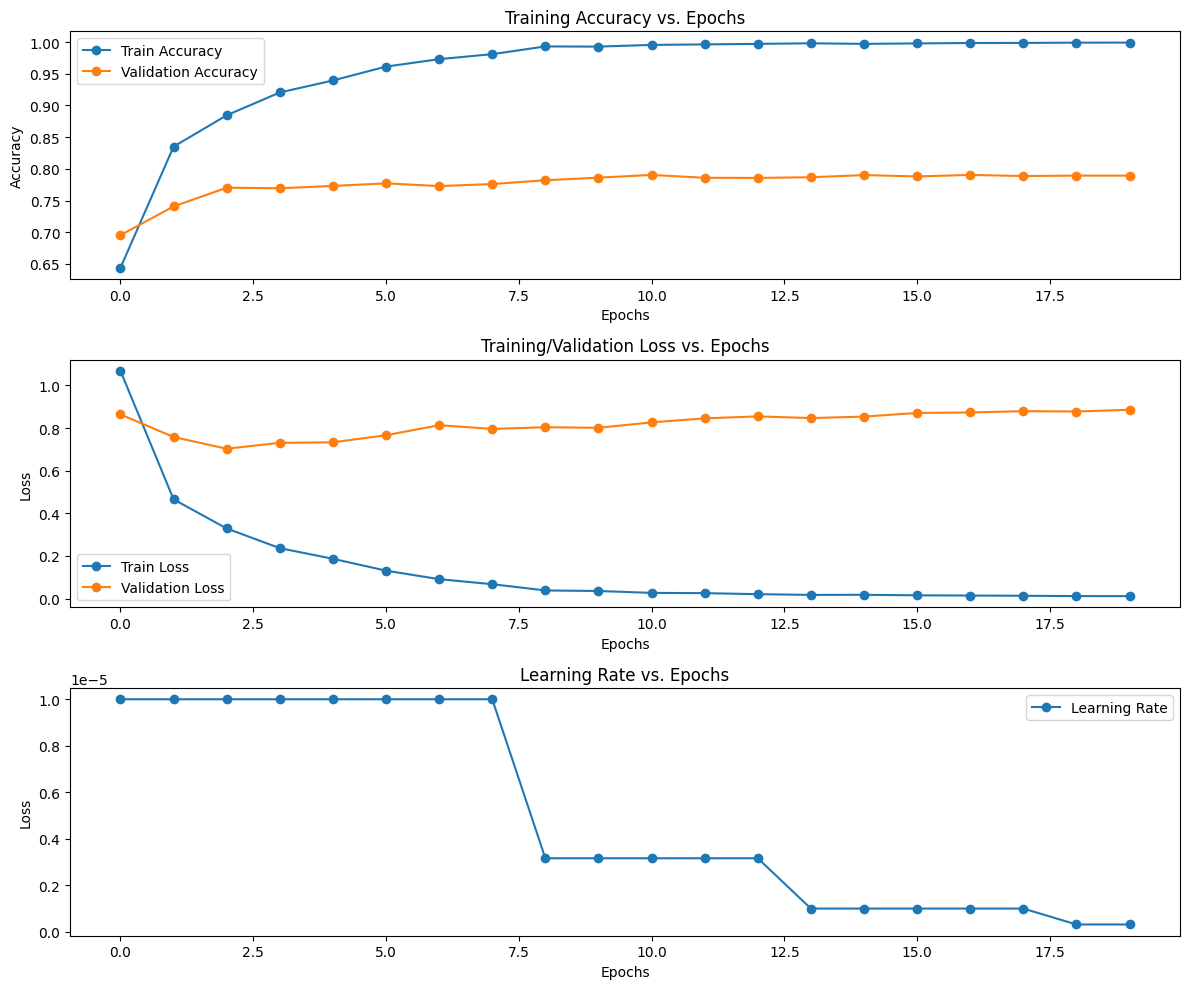

In [22]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [25]:
test_dataset = '/kaggle/input/kuhar-img84-dataset/classified_data/test'

In [26]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dataset,
                                                 shuffle=False,
                                                 batch_size=BATCH_SIZE,
                                                 target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                 class_mode='categorical')

Found 5180 images belonging to 18 classes.


In [27]:
predictions = model.predict(test_generator)

216/216 ━━━━━━━━━━━━━━━━━━━━ 83s 370ms/step


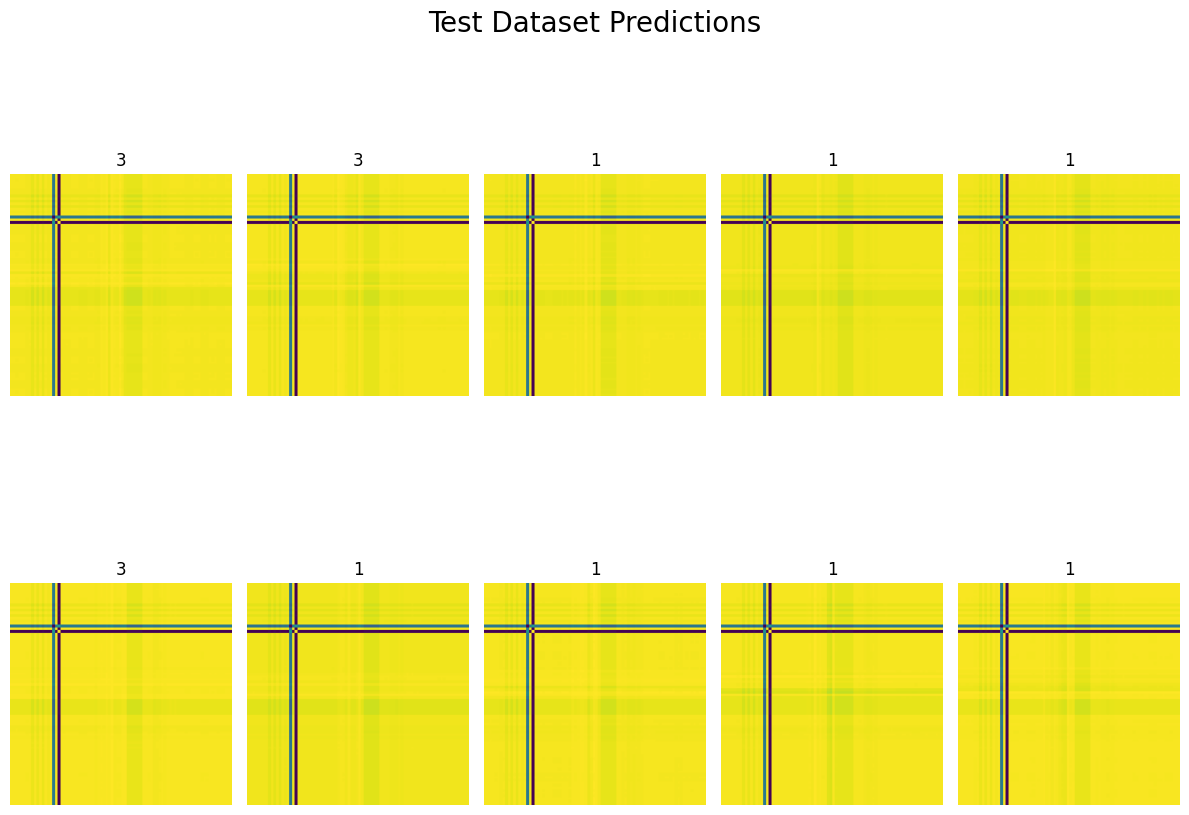

In [28]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [29]:
test_loss, test_accuracy = model.evaluate(test_generator, batch_size=BATCH_SIZE)

216/216 ━━━━━━━━━━━━━━━━━━━━ 39s 179ms/step - accuracy: 0.6803 - loss: 1.2819


In [30]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     0.8991196751594543
Test Accuracy: 0.7714285850524902


In [31]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

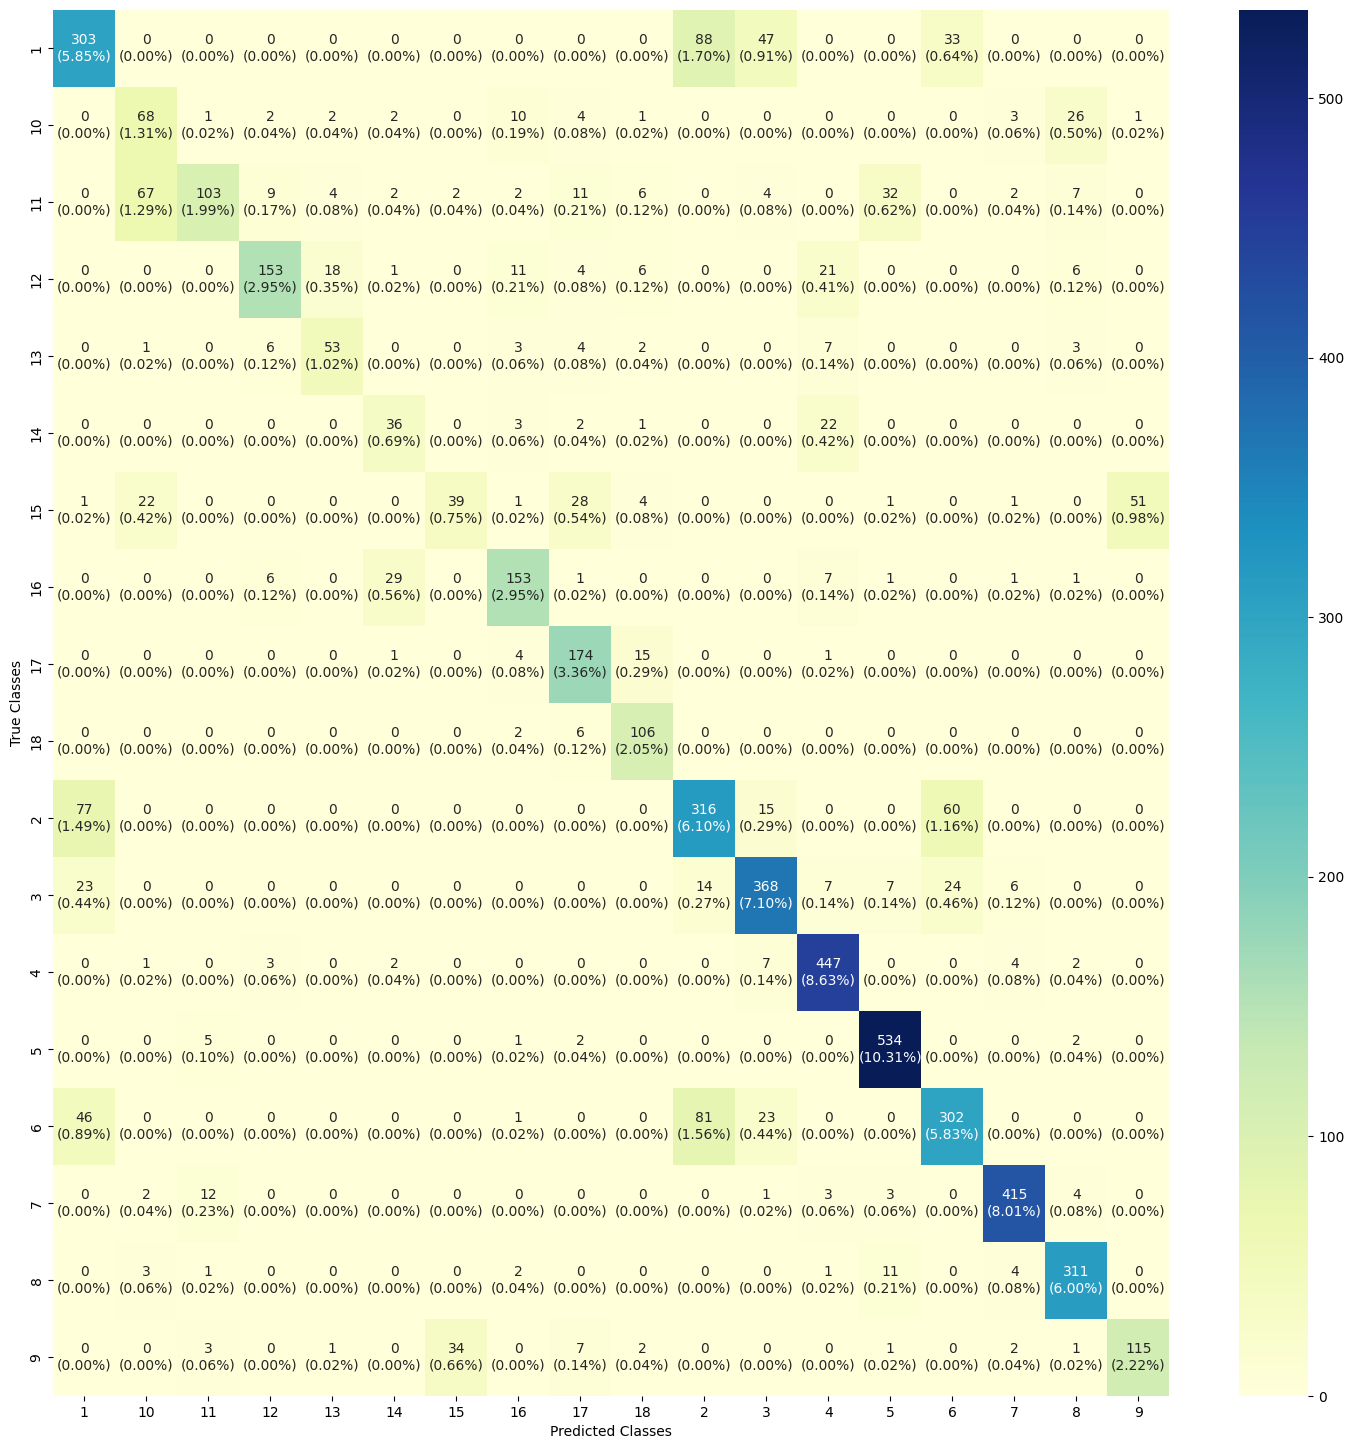

In [33]:
cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(18, 18)

plt.figure(figsize = (18, 18))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [34]:
print(classification_report(y_true, y_pred, target_names=labels.values()))

              precision    recall  f1-score   support

           1       0.67      0.64      0.66       471
          10       0.41      0.57      0.48       120
          11       0.82      0.41      0.55       251
          12       0.85      0.70      0.77       220
          13       0.68      0.67      0.68        79
          14       0.49      0.56      0.53        64
          15       0.52      0.26      0.35       148
          16       0.79      0.77      0.78       199
          17       0.72      0.89      0.79       195
          18       0.74      0.93      0.82       114
           2       0.63      0.68      0.65       468
           3       0.79      0.82      0.81       449
           4       0.87      0.96      0.91       466
           5       0.91      0.98      0.94       544
           6       0.72      0.67      0.69       453
           7       0.95      0.94      0.95       440
           8       0.86      0.93      0.89       333
           9       0.69    

In [35]:
errors = (y_true - y_pred != 0)
y_true_errors = y_true[errors]
y_pred_errors = y_pred[errors]

In [36]:
test_images = test_generator.filenames
test_img = np.asarray(test_images)[errors]

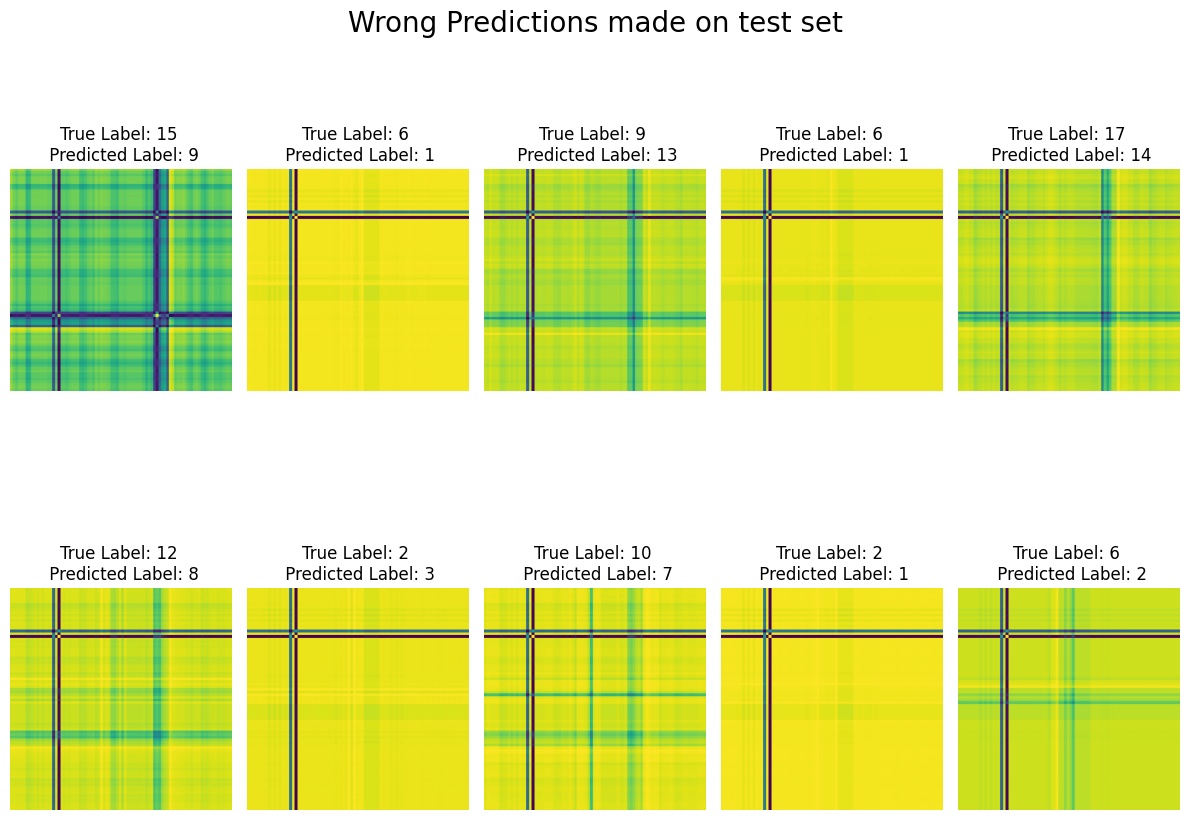

In [37]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(test_img))
        true_index = y_true_errors[idx]
        true_label = labels[true_index]
        predicted_index = y_pred_errors[idx]
        predicted_label = labels[predicted_index]
        ax[i, j].set_title(f"True Label: {true_label} \n Predicted Label: {predicted_label}")
        img_path = os.path.join(test_dataset, test_img[idx])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[i, j].imshow(img)
        ax[i, j].axis("off")

plt.tight_layout()
plt.suptitle('Wrong Predictions made on test set', fontsize=20)
plt.show()

In [38]:
import glob
cv_img1 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/1/*.png"):
    n= cv2.imread(img)
    cv_img1.append(n)
cv_img2 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/2/*.png"):
    n= cv2.imread(img)
    cv_img2.append(n)
cv_img3 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/3/*.png"):
    n= cv2.imread(img)
    cv_img3.append(n)
cv_img4 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/4/*.png"):
    n= cv2.imread(img)
    cv_img4.append(n)
cv_img5 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/5/*.png"):
    n= cv2.imread(img)
    cv_img5.append(n)
cv_img6 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/6/*.png"):
    n= cv2.imread(img)
    cv_img6.append(n)
cv_img7 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/7/*.png"):
    n= cv2.imread(img)
    cv_img7.append(n)
cv_img8 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/8/*.png"):
    n= cv2.imread(img)
    cv_img8.append(n)
cv_img9 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/9/*.png"):
    n= cv2.imread(img)
    cv_img9.append(n)
cv_img10 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/10/*.png"):
    n= cv2.imread(img)
    cv_img10.append(n)
cv_img11 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/11/*.png"):
    n= cv2.imread(img)
    cv_img11.append(n)
cv_img12 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/12/*.png"):
    n= cv2.imread(img)
    cv_img12.append(n)
cv_img13 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/13/*.png"):
    n= cv2.imread(img)
    cv_img13.append(n)
cv_img14 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/14/*.png"):
    n= cv2.imread(img)
    cv_img14.append(n)
cv_img15 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/15/*.png"):
    n= cv2.imread(img)
    cv_img15.append(n)
cv_img16 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/16/*.png"):
    n= cv2.imread(img)
    cv_img16.append(n)
cv_img17 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/17/*.png"):
    n= cv2.imread(img)
    cv_img17.append(n)
cv_img18 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/18/*.png"):
    n= cv2.imread(img)
    cv_img18.append(n)

In [39]:
arr1 = np.array(cv_img1)
arr2 = np.array(cv_img2)
arr3 = np.array(cv_img3)
arr4 = np.array(cv_img4)
arr5 = np.array(cv_img5)
arr6 = np.array(cv_img6)
arr7 = np.array(cv_img7)
arr8 = np.array(cv_img8)
arr9 = np.array(cv_img9)
arr10 = np.array(cv_img10)
arr11 = np.array(cv_img11)
arr12 = np.array(cv_img12)
arr13 = np.array(cv_img13)
arr14 = np.array(cv_img14)
arr15 = np.array(cv_img15)
arr16 = np.array(cv_img16)
arr17 = np.array(cv_img17)
arr18 = np.array(cv_img18)

In [40]:
print(arr1.shape)
print(arr2.shape)
print(arr3.shape)
print(arr4.shape)
print(arr5.shape)
print(arr6.shape)
print(arr7.shape)
print(arr8.shape)
print(arr9.shape)
print(arr10.shape)
print(arr11.shape)
print(arr12.shape)
print(arr13.shape)
print(arr14.shape)
print(arr15.shape)
print(arr16.shape)
print(arr17.shape)
print(arr18.shape)

(991, 369, 369, 3)
(985, 369, 369, 3)
(944, 369, 369, 3)
(980, 369, 369, 3)
(1144, 369, 369, 3)
(952, 369, 369, 3)
(926, 369, 369, 3)
(700, 369, 369, 3)
(350, 369, 369, 3)
(252, 369, 369, 3)
(528, 369, 369, 3)
(464, 369, 369, 3)
(167, 369, 369, 3)
(137, 369, 369, 3)
(313, 369, 369, 3)
(420, 369, 369, 3)
(411, 369, 369, 3)
(241, 369, 369, 3)


In [41]:
train_data=np.concatenate([arr1,arr2,arr3,arr4,arr5,arr6,arr7,arr8,arr9,arr10,arr11,arr12,arr13,arr14,arr15,arr16,arr17,arr18],axis=0)

In [42]:
train_data.shape

(10905, 369, 369, 3)

In [43]:
layer_output = model.get_layer('flatten').output
intermediate_model= Model(inputs=model.input, outputs=layer_output)
feature_extractor_ex=intermediate_model.predict(train_data)

341/341 ━━━━━━━━━━━━━━━━━━━━ 82s 192ms/step


In [44]:
feature_extractor_ex.shape

(10905, 2304)

In [45]:
del arr1,arr2,arr3,arr4,arr5,arr6,arr7,arr8,arr9,arr10,arr11,arr12,arr13,arr14,arr15,arr16,arr17,arr18 

In [46]:
Y1= np.full((991, 1), 1)
print(Y1.shape)
print(Y1[0])
Y2= np.full((985, 1), 2)
Y3= np.full((944, 1), 3)
Y4= np.full((980, 1), 4)
Y5= np.full((1144, 1), 5)
Y6= np.full((952, 1), 6)
Y7= np.full((926, 1), 7)
Y8= np.full((700, 1), 8)
Y9= np.full((350, 1), 9)
Y10= np.full((252, 1), 10)
Y11= np.full((528, 1), 11)
Y12= np.full((464, 1), 12)
Y13= np.full((167, 1), 13)
Y14= np.full((137, 1), 14)
Y15= np.full((313, 1), 15)
Y16= np.full((420, 1), 16)
Y17= np.full((411, 1), 17)
Y18= np.full((241, 1), 18)

(991, 1)
[1]


In [47]:
Y=np.concatenate([Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18],axis=0)
print(Y.shape)

(10905, 1)


In [48]:
import glob
cv_imgt1 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/1/*.png"):
    n= cv2.imread(img)
    cv_imgt1.append(n)
cv_imgt2 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/2/*.png"):
    n= cv2.imread(img)
    cv_imgt2.append(n)
cv_imgt3 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/3/*.png"):
    n= cv2.imread(img)
    cv_imgt3.append(n)
cv_imgt4 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/4/*.png"):
    n= cv2.imread(img)
    cv_imgt4.append(n)
cv_imgt5 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/5/*.png"):
    n= cv2.imread(img)
    cv_imgt5.append(n)
cv_imgt6 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/6/*.png"):
    n= cv2.imread(img)
    cv_imgt6.append(n)
cv_imgt7 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/7/*.png"):
    n= cv2.imread(img)
    cv_imgt7.append(n)
cv_imgt8 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/8/*.png"):
    n= cv2.imread(img)
    cv_imgt8.append(n)
cv_imgt9 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/9/*.png"):
    n= cv2.imread(img)
    cv_imgt9.append(n)
cv_imgt10 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/10/*.png"):
    n= cv2.imread(img)
    cv_imgt10.append(n)
cv_imgt11 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/11/*.png"):
    n= cv2.imread(img)
    cv_imgt11.append(n)
cv_imgt12 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/12/*.png"):
    n= cv2.imread(img)
    cv_imgt12.append(n)
cv_imgt13 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/13/*.png"):
    n= cv2.imread(img)
    cv_imgt13.append(n)
cv_imgt14 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/14/*.png"):
    n= cv2.imread(img)
    cv_imgt14.append(n)
cv_imgt15 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/15/*.png"):
    n= cv2.imread(img)
    cv_imgt15.append(n)
cv_imgt16 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/16/*.png"):
    n= cv2.imread(img)
    cv_imgt16.append(n)
cv_imgt17 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/17/*.png"):
    n= cv2.imread(img)
    cv_imgt17.append(n)
cv_imgt18 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/18/*.png"):
    n= cv2.imread(img)
    cv_imgt18.append(n)

In [49]:
arrt1 = np.array(cv_imgt1)
arrt2 = np.array(cv_imgt2)
arrt3 = np.array(cv_imgt3)
arrt4 = np.array(cv_imgt4)
arrt5 = np.array(cv_imgt5)
arrt6 = np.array(cv_imgt6)
arrt7 = np.array(cv_imgt7)
arrt8 = np.array(cv_imgt8)
arrt9 = np.array(cv_imgt9)
arrt10 = np.array(cv_imgt10)
arrt11 = np.array(cv_imgt11)
arrt12 = np.array(cv_imgt12)
arrt13 = np.array(cv_imgt13)
arrt14 = np.array(cv_imgt14)
arrt15 = np.array(cv_imgt15)
arrt16 = np.array(cv_imgt16)
arrt17 = np.array(cv_imgt17)
arrt18 = np.array(cv_imgt18)

In [50]:
print(arrt1.shape)
print(arrt2.shape)
print(arrt3.shape)
print(arrt4.shape)
print(arrt5.shape)
print(arrt6.shape)
print(arrt7.shape)
print(arrt8.shape)
print(arrt9.shape)
print(arrt10.shape)
print(arrt11.shape)
print(arrt12.shape)
print(arrt13.shape)
print(arrt14.shape)
print(arrt15.shape)
print(arrt16.shape)
print(arrt17.shape)
print(arrt18.shape)

(471, 369, 369, 3)
(468, 369, 369, 3)
(449, 369, 369, 3)
(466, 369, 369, 3)
(544, 369, 369, 3)
(453, 369, 369, 3)
(440, 369, 369, 3)
(333, 369, 369, 3)
(166, 369, 369, 3)
(120, 369, 369, 3)
(251, 369, 369, 3)
(220, 369, 369, 3)
(79, 369, 369, 3)
(64, 369, 369, 3)
(148, 369, 369, 3)
(199, 369, 369, 3)
(195, 369, 369, 3)
(114, 369, 369, 3)


In [51]:
test_data=np.concatenate([arrt1,arrt2,arrt3,arrt4,arrt5,arrt6,arrt7,arrt8,arrt9,arrt10,arrt11,arrt12,arrt13,arrt14,arrt15,arrt16,arrt17,arrt18],axis=0)

In [52]:
test_data.shape

(5180, 369, 369, 3)

In [53]:
layer_output = model.get_layer('flatten').output
intermediate_model= Model(inputs=model.input, outputs=layer_output)
feature_extractor_ex_test=intermediate_model.predict(test_data)

162/162 ━━━━━━━━━━━━━━━━━━━━ 50s 297ms/step


In [54]:
feature_extractor_ex_test.shape

(5180, 2304)

In [55]:
Yt1= np.full((471, 1), 1)
print(Y1.shape)
print(Y1[0])
Yt2= np.full((468, 1), 2)
Yt3= np.full((449, 1), 3)
Yt4= np.full((466, 1), 4)
Yt5= np.full((544, 1), 5)
Yt6= np.full((453, 1), 6)
Yt7= np.full((440, 1), 7)
Yt8= np.full((333, 1), 8)
Yt9= np.full((166, 1), 9)
Yt10= np.full((120, 1), 10)
Yt11= np.full((251, 1), 11)
Yt12= np.full((220, 1), 12)
Yt13= np.full((79, 1), 13)
Yt14= np.full((64, 1), 14)
Yt15= np.full((148, 1), 15)
Yt16= np.full((199, 1), 16)
Yt17= np.full((195, 1), 17)
Yt18= np.full((114, 1), 18)

(991, 1)
[1]


In [56]:
Yt=np.concatenate([Yt1,Yt2,Yt3,Yt4,Yt5,Yt6,Yt7,Yt8,Yt9,Yt10,Yt11,Yt12,Yt13,Yt14,Yt15,Yt16,Yt17,Yt18],axis=0)
print(Yt.shape)

(5180, 1)


In [57]:
del arrt1,arrt2,arrt3,arrt4,arrt5,arrt6,arrt7,arrt8,arrt9,arrt10,arrt11,arrt12,arrt13,arrt14,arrt15,arrt16,arrt17,arrt18 

In [58]:
import glob
cv_imgv1 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/1/*.png"):
    n= cv2.imread(img)
    cv_imgv1.append(n)
cv_imgv2 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/2/*.png"):
    n= cv2.imread(img)
    cv_imgv2.append(n)
cv_imgv3 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/3/*.png"):
    n= cv2.imread(img)
    cv_imgv3.append(n)
cv_imgv4 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/4/*.png"):
    n= cv2.imread(img)
    cv_imgv4.append(n)
cv_imgv5 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/5/*.png"):
    n= cv2.imread(img)
    cv_imgv5.append(n)
cv_imgv6 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/6/*.png"):
    n= cv2.imread(img)
    cv_imgv6.append(n)
cv_imgv7 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/7/*.png"):
    n= cv2.imread(img)
    cv_imgv7.append(n)
cv_imgv8 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/8/*.png"):
    n= cv2.imread(img)
    cv_imgv8.append(n)
cv_imgv9 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/9/*.png"):
    n= cv2.imread(img)
    cv_imgv9.append(n)
cv_imgv10 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/10/*.png"):
    n= cv2.imread(img)
    cv_imgv10.append(n)
cv_imgv11 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/11/*.png"):
    n= cv2.imread(img)
    cv_imgv11.append(n)
cv_imgv12 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/12/*.png"):
    n= cv2.imread(img)
    cv_imgv12.append(n)
cv_imgv13 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/13/*.png"):
    n= cv2.imread(img)
    cv_imgv13.append(n)
cv_imgv14 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/14/*.png"):
    n= cv2.imread(img)
    cv_imgv14.append(n)
cv_imgv15 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/15/*.png"):
    n= cv2.imread(img)
    cv_imgv15.append(n)
cv_imgv16 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/16/*.png"):
    n= cv2.imread(img)
    cv_imgv16.append(n)
cv_imgv17 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/17/*.png"):
    n= cv2.imread(img)
    cv_imgv17.append(n)
cv_imgv18 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/18/*.png"):
    n= cv2.imread(img)
    cv_imgv18.append(n)

In [59]:
arrv1 = np.array(cv_imgv1)
arrv2 = np.array(cv_imgv2)
arrv3 = np.array(cv_imgv3)
arrv4 = np.array(cv_imgv4)
arrv5 = np.array(cv_imgv5)
arrv6 = np.array(cv_imgv6)
arrv7 = np.array(cv_imgv7)
arrv8 = np.array(cv_imgv8)
arrv9 = np.array(cv_imgv9)
arrv10 = np.array(cv_imgv10)
arrv11 = np.array(cv_imgv11)
arrv12 = np.array(cv_imgv12)
arrv13 = np.array(cv_imgv13)
arrv14 = np.array(cv_imgv14)
arrv15 = np.array(cv_imgv15)
arrv16 = np.array(cv_imgv16)
arrv17 = np.array(cv_imgv17)
arrv18 = np.array(cv_imgv18)

In [60]:
print(arrv1.shape)
print(arrv2.shape)
print(arrv3.shape)
print(arrv4.shape)
print(arrv5.shape)
print(arrv6.shape)
print(arrv7.shape)
print(arrv8.shape)
print(arrv9.shape)
print(arrv10.shape)
print(arrv11.shape)
print(arrv12.shape)
print(arrv13.shape)
print(arrv14.shape)
print(arrv15.shape)
print(arrv16.shape)
print(arrv17.shape)
print(arrv18.shape)

(424, 369, 369, 3)
(421, 369, 369, 3)
(404, 369, 369, 3)
(420, 369, 369, 3)
(490, 369, 369, 3)
(408, 369, 369, 3)
(396, 369, 369, 3)
(300, 369, 369, 3)
(150, 369, 369, 3)
(108, 369, 369, 3)
(226, 369, 369, 3)
(198, 369, 369, 3)
(71, 369, 369, 3)
(58, 369, 369, 3)
(134, 369, 369, 3)
(179, 369, 369, 3)
(175, 369, 369, 3)
(103, 369, 369, 3)


In [61]:
val_data=np.concatenate([arrv1,arrv2,arrv3,arrv4,arrv5,arrv6,arrv7,arrv8,arrv9,arrv10,arrv11,arrv12,arrv13,arrv14,arrv15,arrv16,arrv17,arrv18],axis=0)

In [62]:
val_data.shape

(4665, 369, 369, 3)

In [63]:
layer_output = model.get_layer('flatten').output
intermediate_model= Model(inputs=model.input, outputs=layer_output)
feature_extractor_ex_val=intermediate_model.predict(val_data)

146/146 ━━━━━━━━━━━━━━━━━━━━ 27s 169ms/step


In [64]:
feature_extractor_ex_val.shape

(4665, 2304)

In [65]:
Yv1= np.full((424, 1), 1)
print(Y1.shape)
print(Y1[0])
Yv2= np.full((421, 1), 2)
Yv3= np.full((404, 1), 3)
Yv4= np.full((420, 1), 4)
Yv5= np.full((490, 1), 5)
Yv6= np.full((408, 1), 6)
Yv7= np.full((396, 1), 7)
Yv8= np.full((300, 1), 8)
Yv9= np.full((150, 1), 9)
Yv10= np.full((108, 1), 10)
Yv11= np.full((226, 1), 11)
Yv12= np.full((198, 1), 12)
Yv13= np.full((71, 1), 13)
Yv14= np.full((58, 1), 14)
Yv15= np.full((134, 1), 15)
Yv16= np.full((179, 1), 16)
Yv17= np.full((175, 1), 17)
Yv18= np.full((103, 1), 18)

(991, 1)
[1]


In [66]:
Yv=np.concatenate([Yv1,Yv2,Yv3,Yv4,Yv5,Yv6,Yv7,Yv8,Yv9,Yv10,Yv11,Yv12,Yv13,Yv14,Yv15,Yv16,Yv17,Yv18],axis=0)
print(Yv.shape)

(4665, 1)


In [67]:
X_ex=np.concatenate([feature_extractor_ex,feature_extractor_ex_val],axis=0)
print(X_ex.shape)

(15570, 2304)


In [68]:
Y_ex=np.concatenate([Y,Yv],axis=0)
print(Y_ex.shape)

(15570, 1)


In [70]:
import pandas as pd
df=pd.DataFrame(X_ex)
df.to_csv('kuhar_img84_X_2304features_ex.csv',index=False)

dfy=pd.DataFrame(Y_ex)
dfy.to_csv('kuhar_img84_Y_2304features_ex.csv',index=False)

dft=pd.DataFrame(feature_extractor_ex_test)
dft.to_csv('kuhar_img84_X_2304features_ex_test.csv',index=False)

dfyt=pd.DataFrame(Yt)
dfyt.to_csv('kuhar_img84_Y_2304features_ex_test.csv',index=False)